In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
%matplotlib inline

from sklearn.model_selection import train_test_split

In [3]:
url='https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv'

df=pd.read_csv(url)


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
def plot_hist_box(df,column_name):
    fig ,ax = plt.subplots(1,2,figsize=(16,6))
    sns.histplot(data=df,x=column_name,kde=True,ax=ax[0])
    sns.boxplot(data=df,x=column_name,ax=ax[1])
    plt.show()

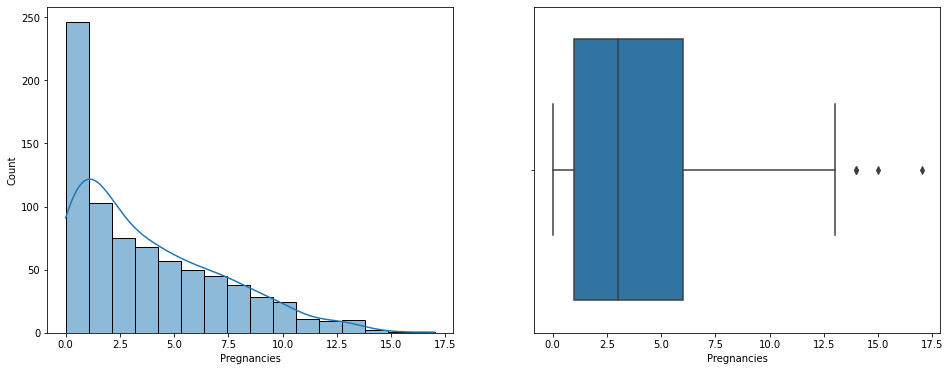

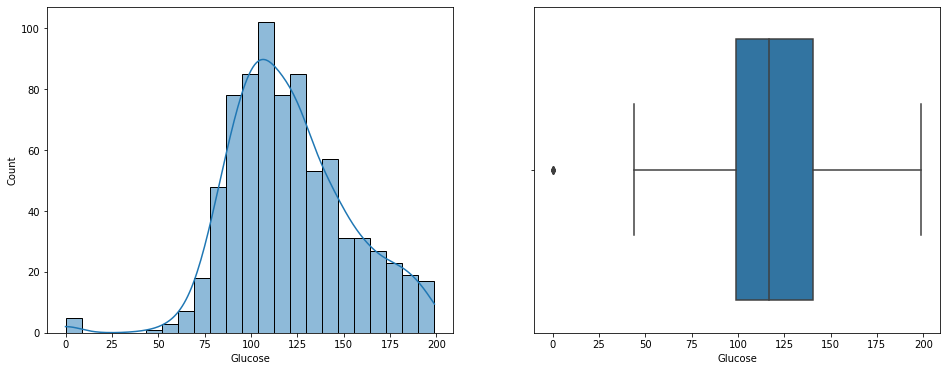

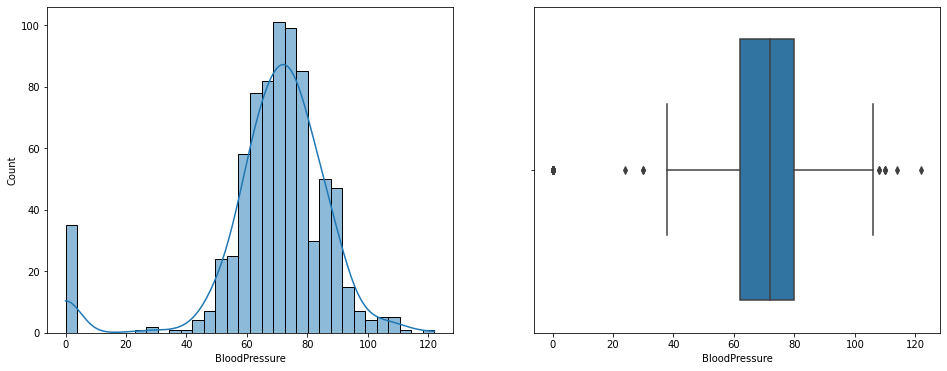

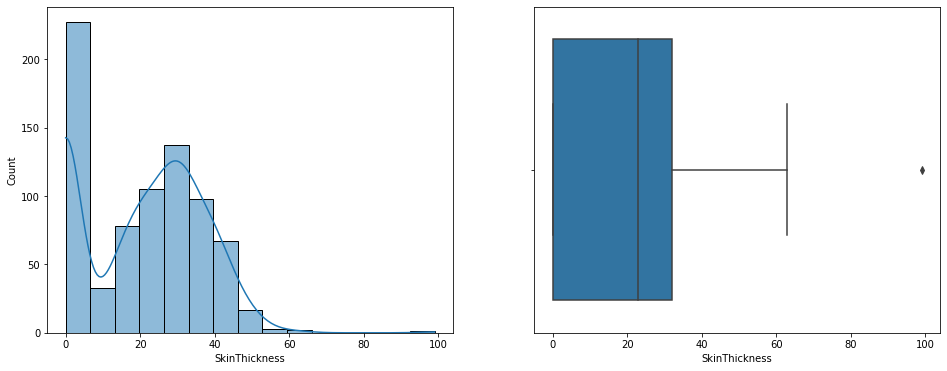

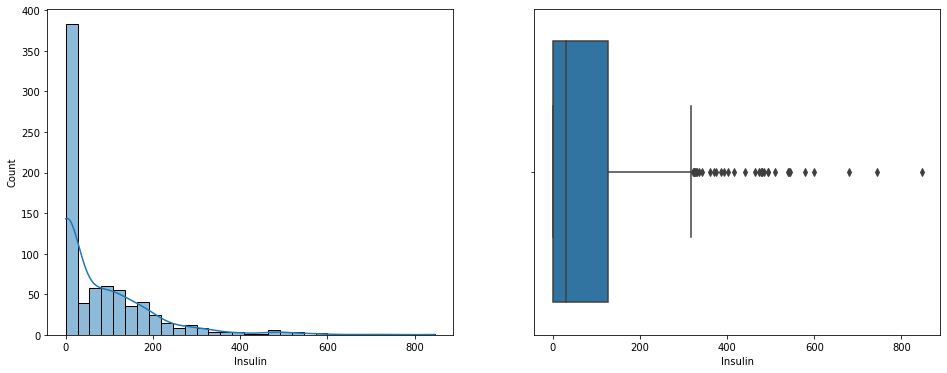

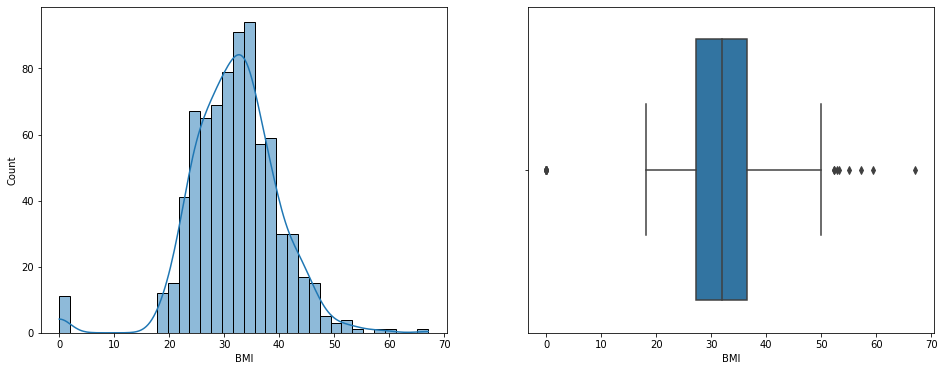

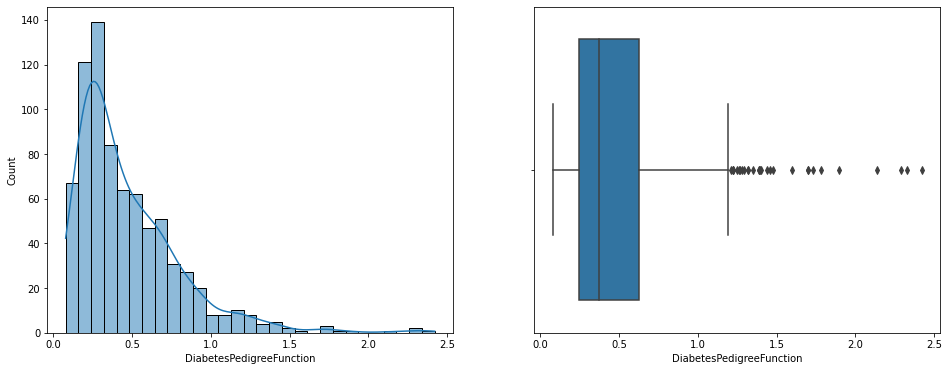

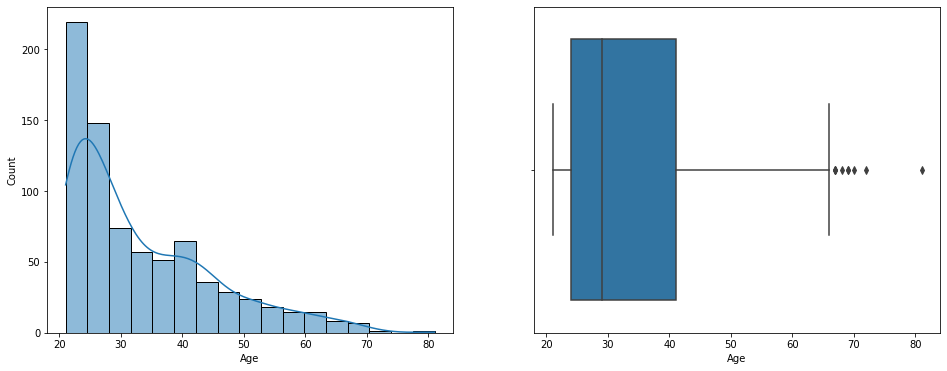

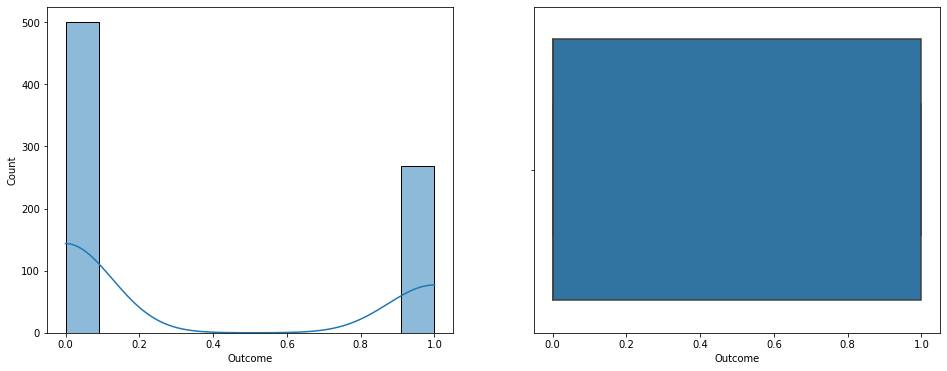

In [11]:
for i in df.columns:
    plot_hist_box(df,i)

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


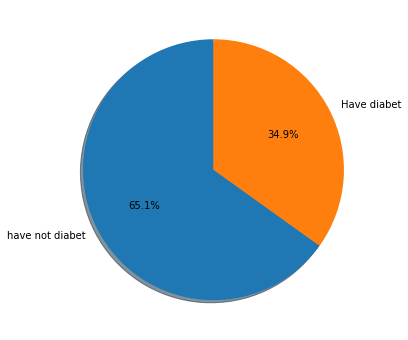

In [13]:
data=df['Outcome'].value_counts()
keys=['have not diabet','Have diabet',]

plt.figure(figsize=(6,6))
plt.pie(data,labels=keys,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [14]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
def plot_scatter(df,column_name):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df,x=column_name,y='Outcome',hue='Outcome')
    plt.show()

In [16]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [17]:
def remove_outlires(data,column_name):
        Q1 = np.percentile(df[column_name], 25)
        Q3 = np.percentile(df[column_name],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_index = data[(data[column_name] < Q1 - outlier_step) | (data[column_name] > Q3 + outlier_step )].index
        
        data.drop(outlier_index,axis=0,inplace=True)
        return df
        


In [18]:
X=df.columns[:-1]
y=df.columns[-1]

X=df[X]
y=df[y]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X=scaler.fit_transform(X)

In [20]:
X_train ,X_test, y_train ,y_test =train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
def get_result(model_name):
    model=model_name
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    
    print(classification_report(y_test,predict))
    
    plt.figure(figsize=(4,4))
    sns.heatmap(confusion_matrix(y_test,predict),annot=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.56      0.56      0.56        45

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154



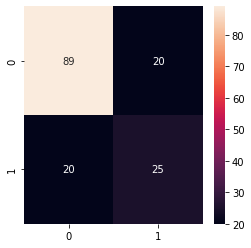

In [23]:
get_result(SGDClassifier())

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       109
           1       0.51      0.58      0.54        45

    accuracy                           0.71       154
   macro avg       0.66      0.67      0.67       154
weighted avg       0.73      0.71      0.72       154



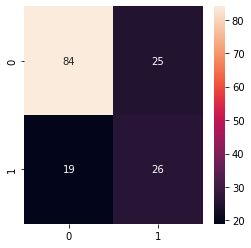

In [24]:
get_result(DecisionTreeClassifier())

In [25]:
from sklearn.model_selection import GridSearchCV
params= { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)


Fitting 3 folds for each of 7056 candidates, totalling 21168 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [26]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 7,
 'min_samples_split': 2}

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       109
           1       0.58      0.78      0.67        45

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.75       154
weighted avg       0.80      0.77      0.78       154



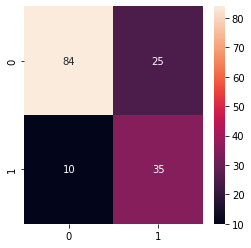

In [27]:
get_result(DecisionTreeClassifier(criterion='gini',
 max_depth= 4,
 max_leaf_nodes= 7,
 min_samples_split= 2))